<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana6/Descenso2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time
import copy

In [2]:
def Plotter(e):

  fig = plt.figure(figsize=(8,3))
  ax = fig.add_subplot(121,projection='3d')
  ax.view_init(25,45)

  ax1 = fig.add_subplot(122)
  ax.set_title('{:.0f}'.format(e),fontsize=10)

  return ax,ax1

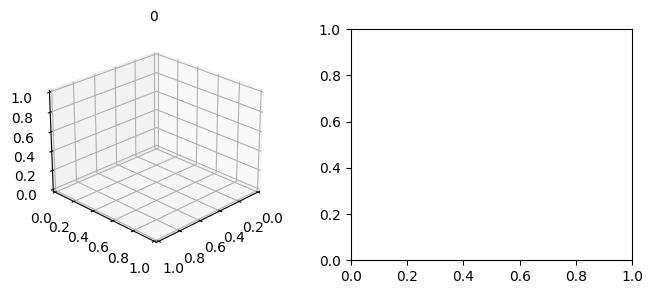

In [3]:
ax,_ = Plotter(0)

In [4]:
def f2(x,y):
  #return x**4 + y**4 -2*(x-y)**2
  return x**2 + y**2 + x*np.sin(y) + y*np.sin(x)

In [5]:
Dx = lambda x,y,h=1e-5: (f2(x+h,y)-f2(x-h,y))/(2*h)
Dy = lambda x,y,h=1e-5: (f2(x,y+h)-f2(x,y-h))/(2*h)

In [6]:
Gradient = lambda x,y: np.array([Dx(x,y),Dy(x,y)])